In [1]:
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plot
%matplotlib inline

adata = sc.read('brain_embeddings.h5ad')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


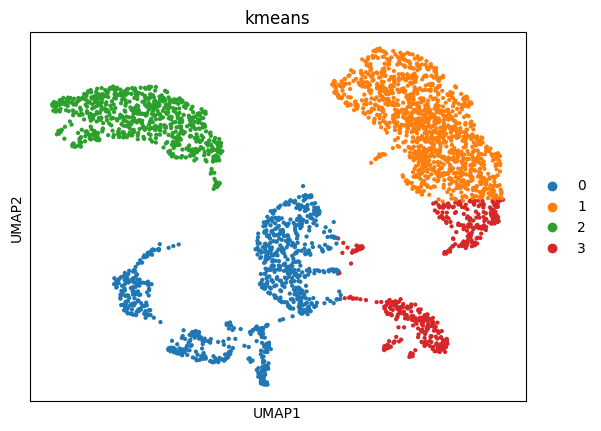

In [2]:
umap_coordinates = adata.obsm['X_umap']
kmeans = KMeans(n_clusters=4, random_state=0).fit(umap_coordinates)

adata.obs['kmeans'] = kmeans.labels_
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans')

In [3]:
rand_index = adjusted_rand_score(labels_true=adata.obs['cell_ontology_class'], labels_pred=adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.7


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


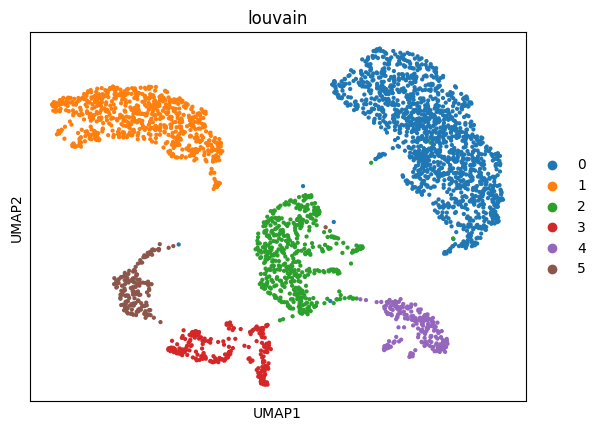

The rand index is  0.91


In [4]:
sc.tl.louvain(adata, resolution=0.1)
sc.pl.umap(adata, color='louvain')
rand_index = adjusted_rand_score(adata.obs['cell_ontology_class'], adata.obs['louvain'])
print('The rand index is ', round(rand_index, 2))

In [5]:
sc.tl.louvain(adata, resolution=0.1)
adata.write('brain_clusters.h5ad')